In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
gender_submission=pd.read_csv("gender_submission.csv")
total_data=train.append(test)

C:\Users\adamb\AppData\Local\Temp\ipykernel_3448\2611758020.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data=train.append(test)


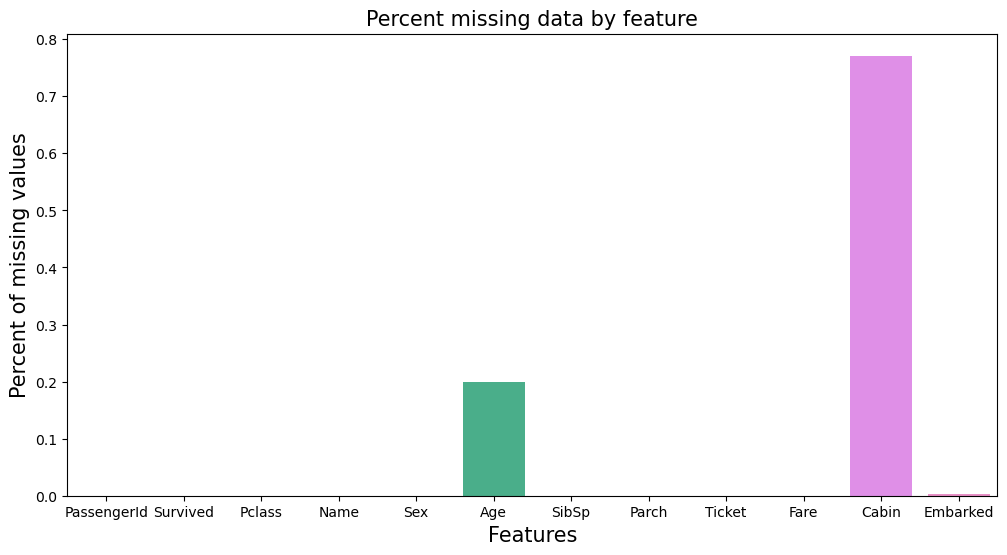

In [4]:
plt.style.use('default')
total=train.isnull().sum()
percent=train.isnull().sum()/train.isnull().count()
missing_data=pd.concat([total,percent],axis=1, keys=['total', 'percent'])
#missing_data.sort_values(ascending=False)
ax = plt.subplots(figsize=(12, 6))
#plt.xticks(rotation='90')
sns.barplot(x=missing_data.index,y=missing_data['percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [6]:
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Age'].fillna(train['Age'].median(),inplace=True)

In [7]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [8]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
train['Cabin'].fillna('Unknown',inplace=True)
train['Embarked'].fillna('Unknown',inplace=True)
test['Cabin'].fillna('Unknown',inplace=True)
test['Fare'].fillna(train['Fare'].median(),inplace=True)

In [10]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

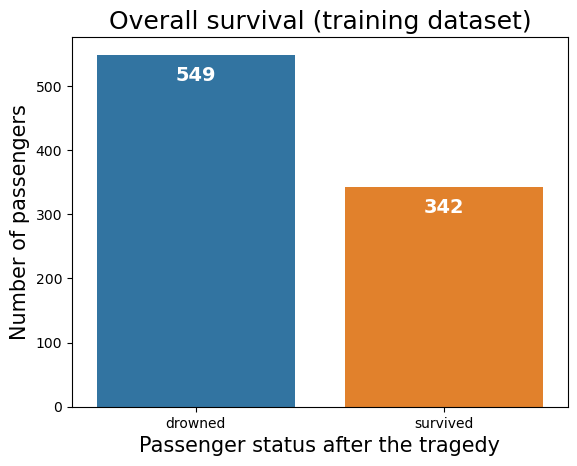

In [11]:
sns.countplot(x='Survived',data=train)
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 18)
# set x label
plt.xlabel('Passenger status after the tragedy',fontsize = 15)
# set y label
plt.ylabel('Number of passengers',fontsize = 15)
labels = (train['Survived'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

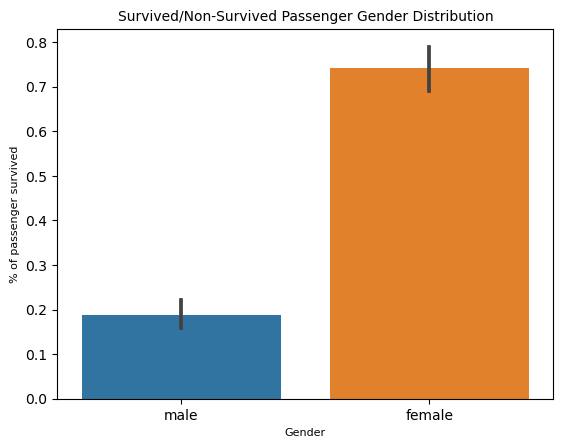

In [12]:
sns.barplot(x = "Sex", y = "Survived", data=train)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize =10)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 8)
plt.xlabel("Gender",fontsize = 8)
plt.show()

In [13]:
print("% of women survived: " , train[train.Sex == 'female'].Survived.sum()/train[train.Sex == 'female'].Survived.count())
print("% of men survived:   " , train[train.Sex == 'male'].Survived.sum()/train[train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


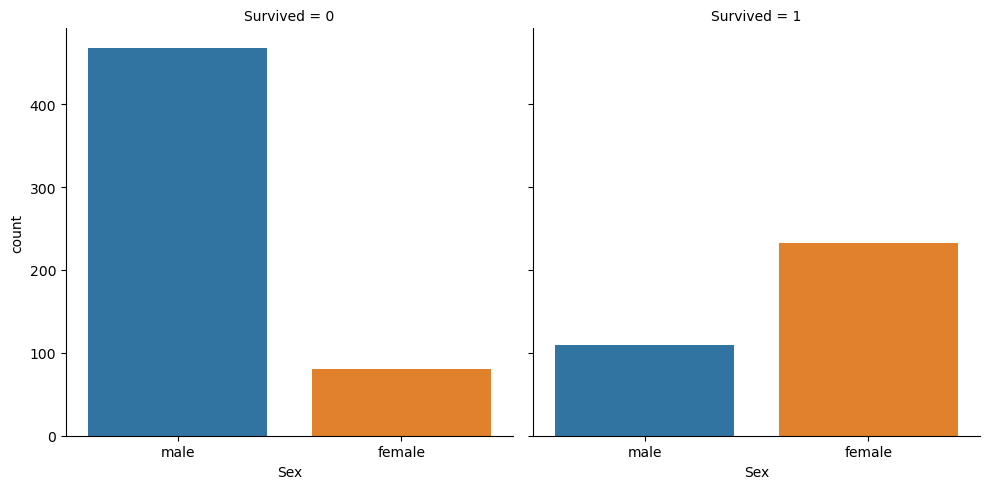

In [14]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train)

plt.show()

In [15]:
train.groupby(['Survived','Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   81     81     81      81    81   
         male            468     468   468  468    468    468     468   468   
1        female          233     233   233  233    233    233     233   233   
         male            109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female     81        81  
         male      468       468  
1        female    233       233  
         male      109       109

In [16]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


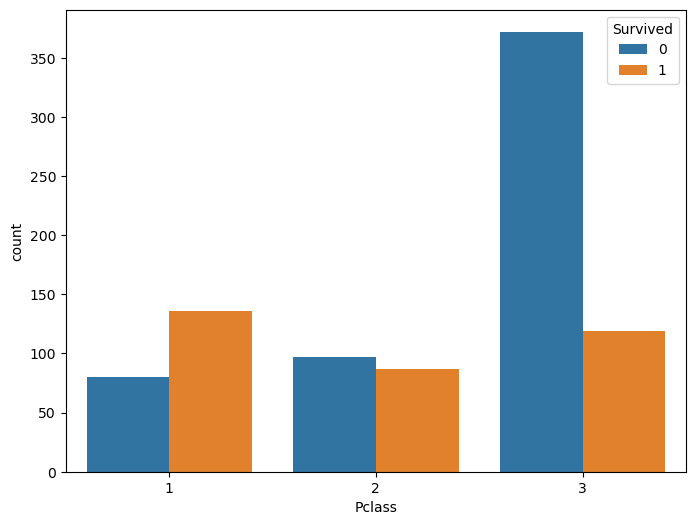

In [17]:
plt.subplots(figsize = (8,6))
sns.countplot('Pclass',hue='Survived',data=train)

plt.show()

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


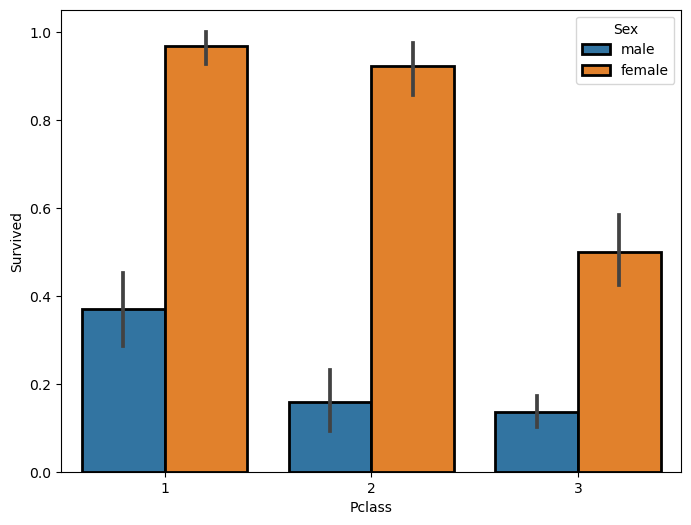

In [18]:
plt.subplots(figsize = (8,6))
sns.barplot('Pclass','Survived',data=train,hue='Sex',edgecolor=(0,0,0), linewidth=2)
plt.show()

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


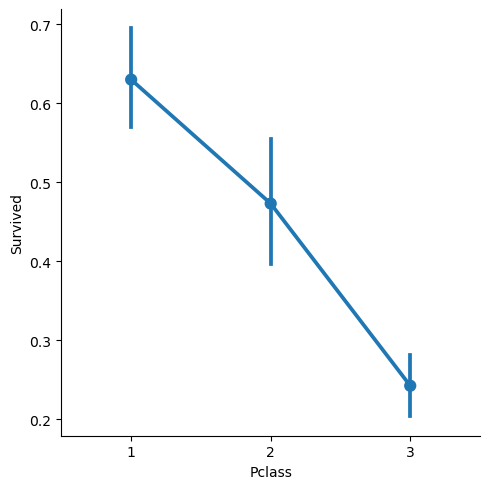

In [19]:
sns.catplot('Pclass','Survived', kind='point', data=train);

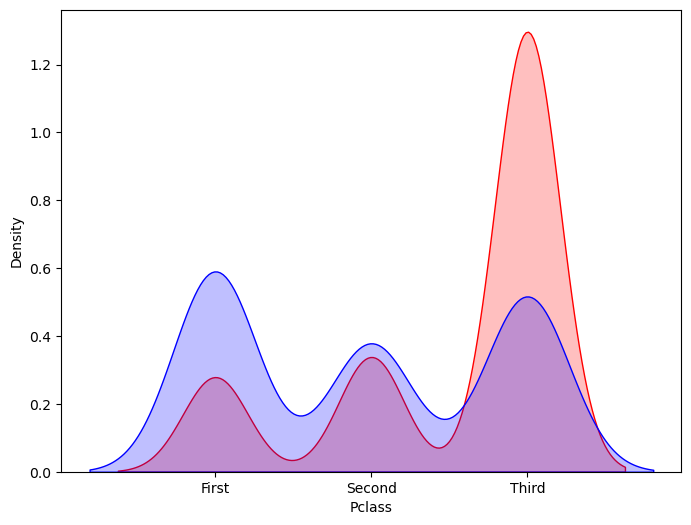

In [20]:
plt.subplots(figsize=(8,6))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)
plt.show()

In [21]:
print("% of survivals in") 
print("Pclass=1 : ", train.Survived[train.Pclass == 1].sum()/train.Survived[train.Pclass == 1].count())
print("Pclass=2 : ", train.Survived[train.Pclass == 2].sum()/train.Survived[train.Pclass == 2].count())
print("Pclass=3 : ", train.Survived[train.Pclass == 3].sum()/train[train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


c:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


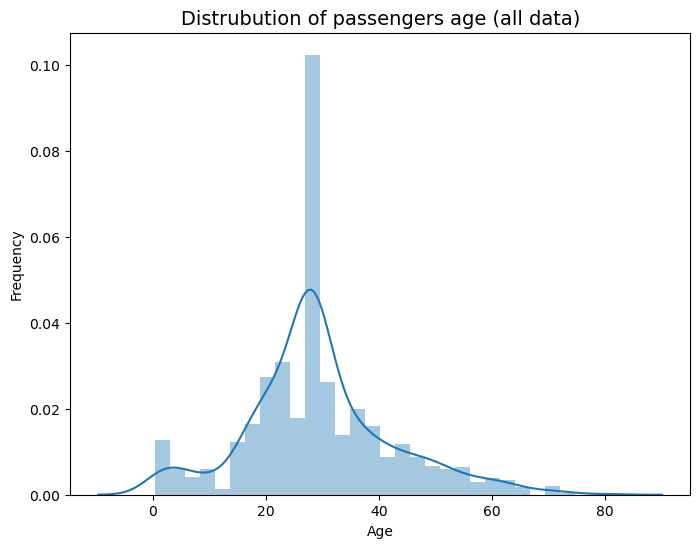

In [22]:
plt.subplots(figsize=(8,6))
sns.distplot(train.Age)
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

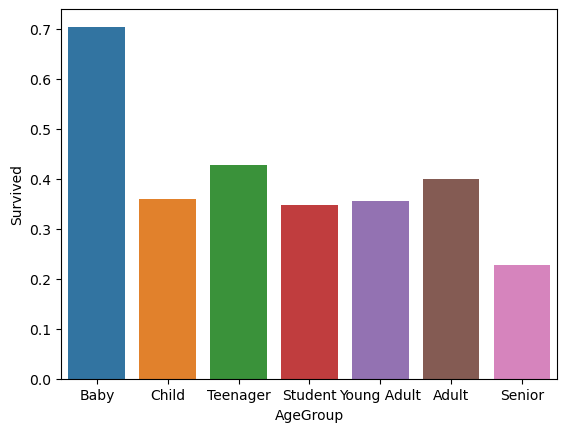

In [23]:
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train,ci=None)
plt.show()

In [24]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

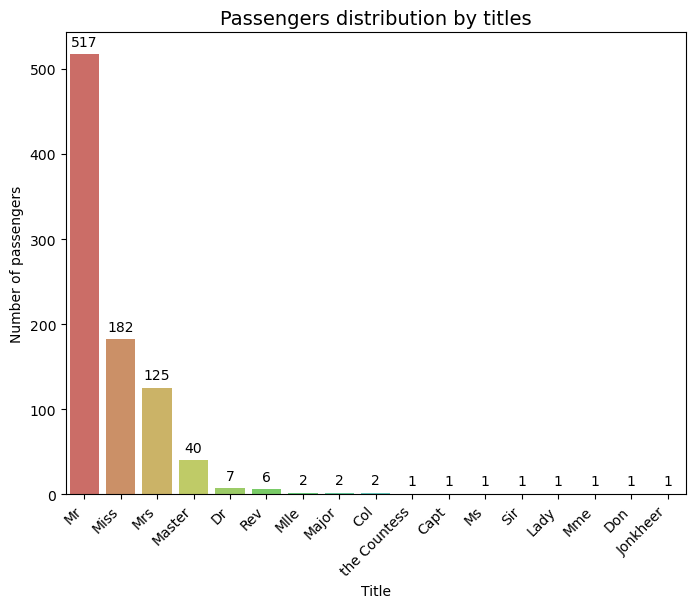

In [25]:
train['Title'] = train['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
test['Title'] = test['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
plt.figure(figsize=(8, 6))
ax = sns.countplot( x = 'Title', data = train, palette = "hls", order = train['Title'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (train['Title'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')

plt.show()

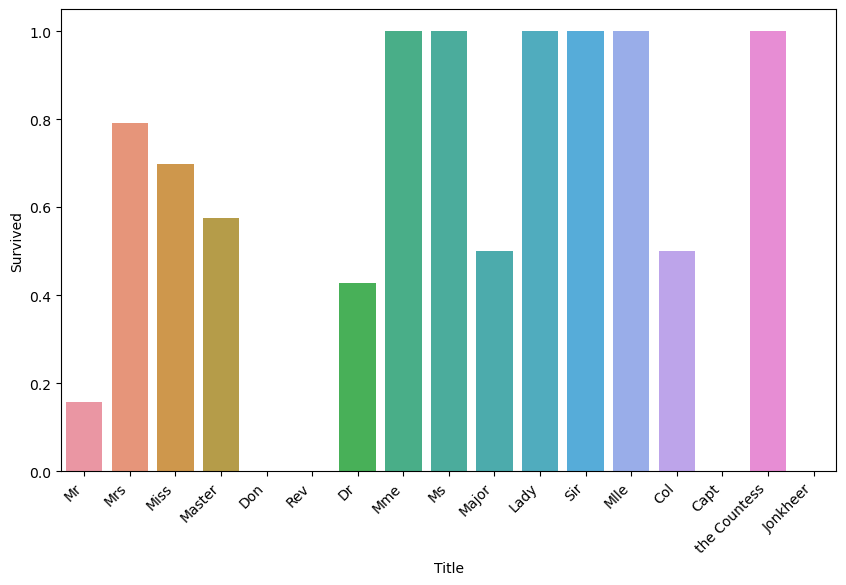

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Title", y="Survived", data=train,ci=None) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.show()

In [27]:
train['Cabin']

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [28]:
train['Cabin'].unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [29]:
train['deck']=train['Cabin'].str.split('',expand=True)[1]
test['deck']=test['Cabin'].str.split('',expand=True)[1]

In [30]:
train['deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

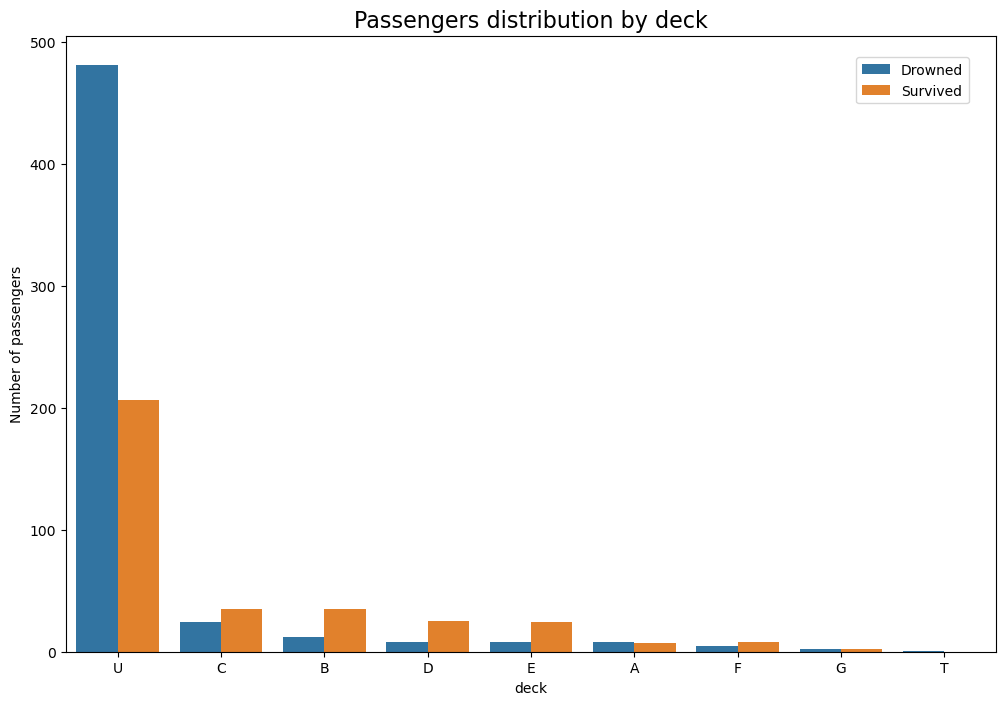

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x=train['deck'],data=train,hue='Survived',order = train['deck'].value_counts().index)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(0.85,0.89))
plt.xticks(rotation = False)


plt.show()

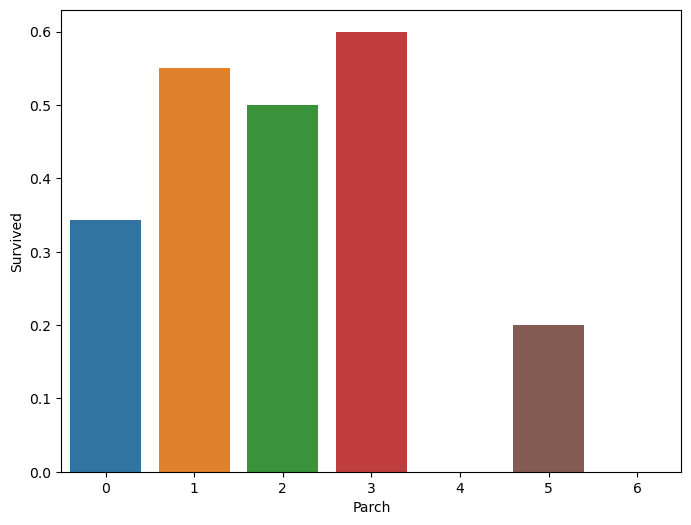

In [32]:
#draw a bar plot for Parch vs. survival
plt.figure(figsize=(8,6))
sns.barplot(x="Parch", y="Survived", data=train,ci=None)
plt.show()

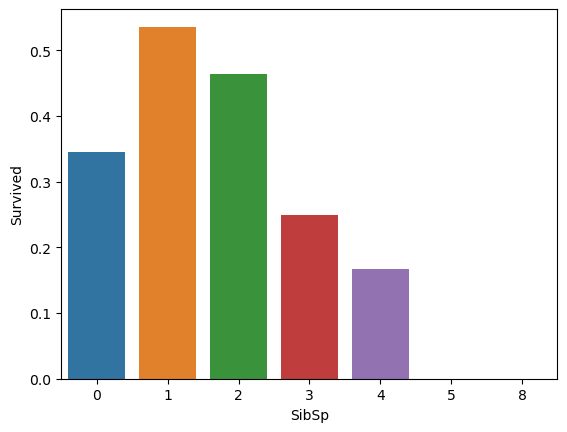

In [33]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train,ci=None)
plt.show()

In [34]:
train['SibSp'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [35]:
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 3 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 4 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


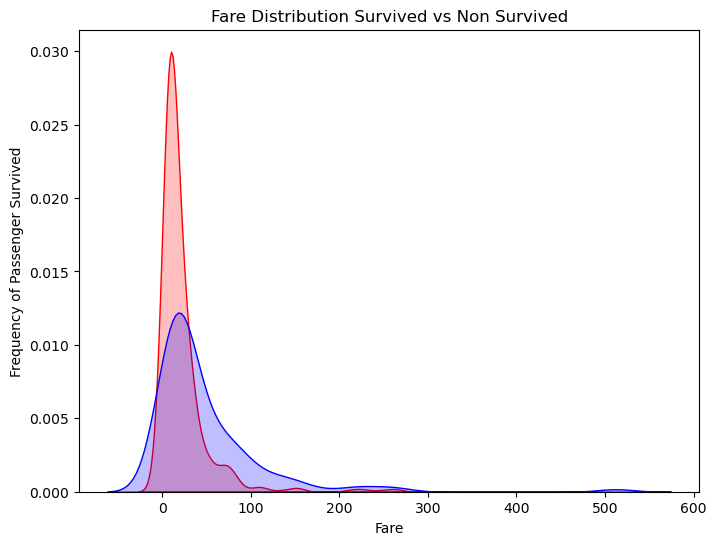

In [36]:
plt.subplots(figsize=(8,6))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived')
plt.ylabel('Frequency of Passenger Survived')
plt.xlabel('Fare')
plt.show()

c:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


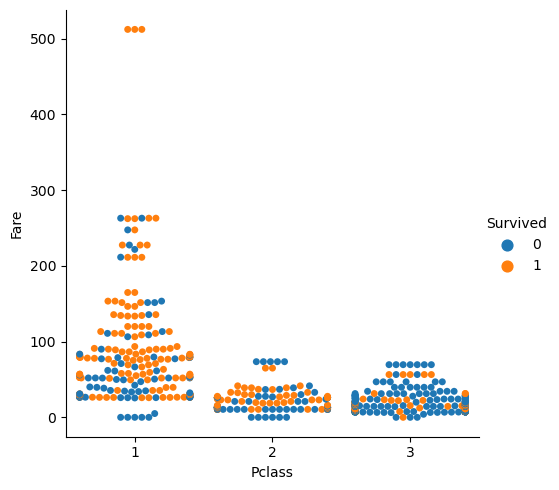

In [37]:
sns.catplot(x="Pclass", y="Fare",hue='Survived', kind="swarm", data=train)
plt.show()

In [38]:
train['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

In [39]:
train['Embarked'].describe()

count     891
unique      4
top         S
freq      644
Name: Embarked, dtype: object

In [40]:
train['Embarked'] = train['Embarked'].replace('Unknown','S')

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


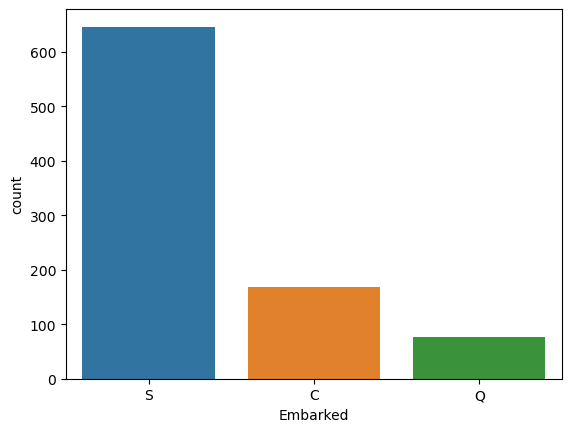

In [41]:
sns.countplot(train.Embarked)
labels = (train['Embarked'].value_counts())

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


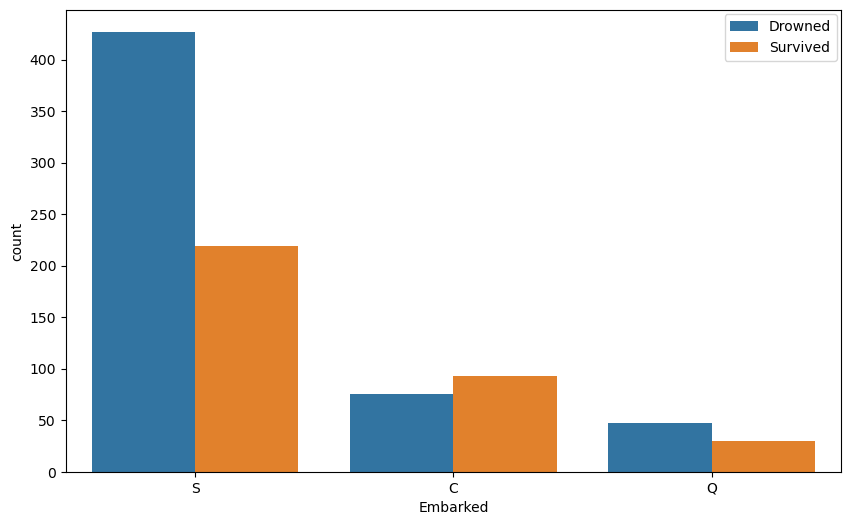

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(train['Embarked'],hue='Survived',data=train)
plt.legend(( 'Drowned', 'Survived'), loc=(0.85,0.89))
plt.show()

In [43]:
total_data=train.append(test)

C:\Users\adamb\AppData\Local\Temp\ipykernel_3448\853838762.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data=train.append(test)


In [44]:
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Student,Mr,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,Miss,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Young Adult,Mr,U


In [45]:
total_data.shape

(1309, 15)

In [46]:
total_data['Sex'] =total_data['Sex'].replace('male',0)
total_data['Sex'] =total_data['Sex'].replace('female',1)
total_data['Embarked'] =total_data['Embarked'].replace('S',0)
total_data['Embarked'] = total_data['Embarked'].replace('Q',1)
total_data['Embarked'] = total_data['Embarked'].replace('C',2)

In [47]:
mapping = {'Mlle': 'Miss', 'Major': 'Rare', 'Col': 'Rare', 'Sir': 'Rare', 'Don': 'Rare', 'Mme': 'Mrs',
           'Jonkheer': 'Rare', 'Lady': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare', 'Ms': 'Miss', 'Dona': 'Mrs', 'Rev':'Rare', 'Dr':'Rare'}

total_data.replace({'Title': mapping}, inplace=True)

total_data['Title'].value_counts(normalize=True)*100

Mr              57.830405
Miss            20.168067
Mrs             15.202445
Master           4.660046
Rare             2.062643
the Countess     0.076394
Name: Title, dtype: float64

In [48]:
total_data['Title'] = total_data['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rare':4})
total_data['Title'].fillna(total_data['Title'].median(),inplace=True)

In [49]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
total_data['deck'] = total_data['deck'].map(cabin_category)

In [50]:
total_data['Family_size'] = total_data['SibSp'] + total_data['Parch'] + 1

In [51]:
total_data['Alone'] = 1
total_data['Alone'].loc[total_data['Family_size'] > 1] = 0

C:\Users\adamb\AppData\Local\Temp\ipykernel_3448\2797604725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['Alone'].loc[total_data['Family_size'] > 1] = 0


In [52]:
bins = [-1, 0, 18, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
total_data['AgeGroup'] = pd.cut(total_data["Age"], bins, labels = labels)
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
total_data['AgeGroup'] = total_data['AgeGroup'].map(age_mapping)

<AxesSubplot:>

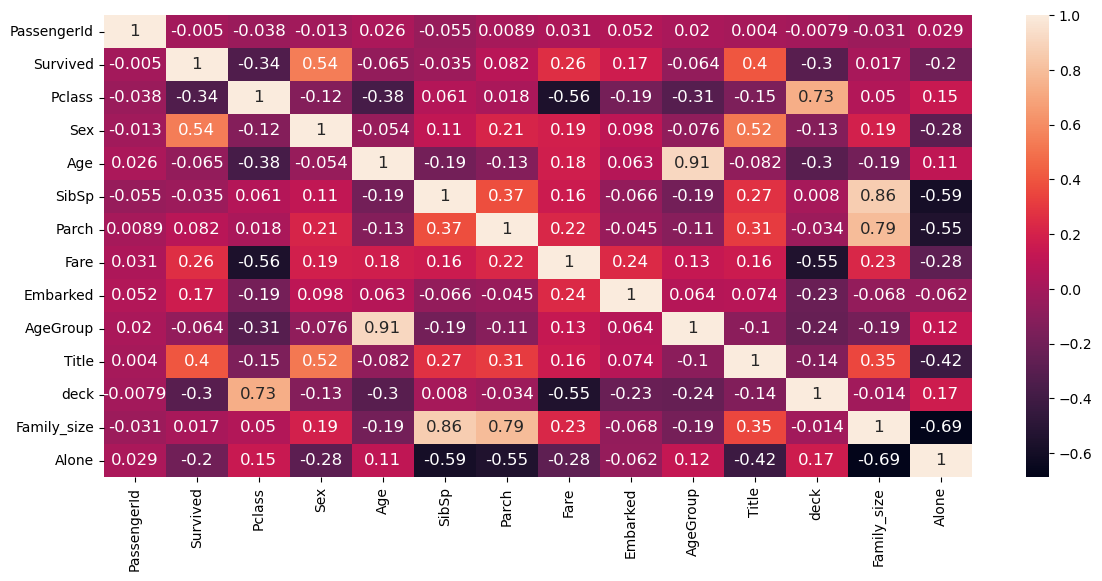

In [53]:
fig,ax=plt.subplots(figsize=(14,6))
sns.heatmap(total_data.corr(),annot=True,annot_kws={'size':12})

In [54]:
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,deck,Family_size,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,2.0,0.0,9,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,4.0,2.0,3,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,3.0,1.0,9,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3.0,2.0,3,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,3.0,0.0,9,1,1


In [55]:
total_data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
AgeGroup         0
Title            0
deck             0
Family_size      0
Alone            0
dtype: int64

In [56]:
features = ['Embarked','Fare','Pclass','Sex','Title','Family_size','Alone']

In [57]:
#Modelos
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Model Select
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [58]:
df_train = total_data[0:891]
df_test =  total_data[891:]
X = df_train[features]
y = df_train['Survived'].astype(int)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=78941)

In [60]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [61]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)


In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

In [63]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [64]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

c:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [65]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [66]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              ' Support Vector Machine', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_linear_svc, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.54,Random Forest
93.54,Decision Tree
86.80,KNN
81.46,Naive Bayes
80.76,Logistic Regression
79.63,Support Vector Machine


In [67]:
model= LogisticRegression(solver= 'lbfgs',max_iter=400)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


cm_logit = confusion_matrix(y_test, predictions)
print('Confusion matrix for Logistic\n',cm_logit)

accuracy_logit = accuracy_score(y_test,predictions)
precision_logit =precision_score(y_test, predictions)
recall_logit =  recall_score(y_test, predictions)
f1_logit = f1_score(y_test, predictions)
print('accuracy_logistic : %.3f' %accuracy_logit)
print('precision_logistic : %.3f' %precision_logit)
print('recall_logistic : %.3f' %recall_logit)
print('f1-score_logistic : %.3f' %f1_logit)
auc_logit = roc_auc_score(y_test,predictions)
print('AUC_logistic : %.2f' % auc_logit)

Confusion matrix for Logistic
 [[97 18]
 [22 42]]
accuracy_logistic : 0.777
precision_logistic : 0.700
recall_logistic : 0.656
f1-score_logistic : 0.677
AUC_logistic : 0.75


In [68]:
randomForestFinalModel = RandomForestClassifier(random_state = 2, bootstrap=False,min_samples_split=2,min_samples_leaf= 5, criterion = 'entropy', max_depth = 13, max_features = 'sqrt', n_estimators = 200)
randomForestFinalModel.fit(X_train, y_train)
predictions_rf = randomForestFinalModel.predict(X_test)

cm_logit = confusion_matrix(y_test, predictions_rf)
print('Confusion matrix for Random Forest\n',cm_logit)

accuracy_logit = accuracy_score(y_test,predictions_rf)
precision_logit =precision_score(y_test, predictions_rf)
recall_logit =  recall_score(y_test, predictions_rf)
f1_logit = f1_score(y_test,predictions_rf)
print('accuracy_random_Forest : %.3f' %accuracy_logit)
print('precision_random_Forest : %.3f' %precision_logit)
print('recall_random_Forest : %.3f' %recall_logit)
print('f1-score_random_Forest : %.3f' %f1_logit)
auc_logit = roc_auc_score(y_test,predictions_rf)
print('AUC_random_Forest: %.2f' % auc_logit)

Confusion matrix for Random Forest
 [[101  14]
 [ 21  43]]
accuracy_random_Forest : 0.804
precision_random_Forest : 0.754
recall_random_Forest : 0.672
f1-score_random_Forest : 0.711
AUC_random_Forest: 0.78


In [69]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": randomForestFinalModel.predict( df_test[features])
})

In [70]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
submission.to_csv("titanic_s.csv",index=False)